In [ ]:
# hide

%load_ext nb_black
%config InlineBackend.figure_format="retina"

<IPython.core.display.Javascript object>

In [ ]:
# dont_test

from will_it_saturate.gevent_client import GeventClient

RuntimeError: cannot release un-acquired lock

<IPython.core.display.Javascript object>

In [ ]:
# dont_test

from will_it_saturate import gevent_client

import numpy as np
import pandas as pd

from will_it_saturate.hosts import Host
from will_it_saturate.epochs import Epoch
from will_it_saturate.servers import BaseServer
from will_it_saturate.control.client import ControlClient

<IPython.core.display.Javascript object>

In [ ]:
# dont_test

file_size = 10 ** 7
server_host_name = "192.168.178.113"
control_server_port, server_port = 8100, 5100
server = BaseServer(host=server_host_name, port=server_port)
server_control_host = Host(name=server_host_name, port=control_server_port)
server_control_client = ControlClient(host=server_control_host)
# epoch = Epoch(file_size=file_size, duration=10)
epoch = Epoch(file_size=file_size, duration=10, file_creator_name="minio")
epoch.files = server_control_client.get_or_create_files(epoch)
epoch.create_urls_from_files(server)

<IPython.core.display.Javascript object>

In [ ]:
# dont_test

benchmark_client = gevent_client.GeventClient(
    name="gevent", host=server_host_name, port=server_port
)
elapsed = benchmark_client.measure(epoch)
print(f"elapsed: {elapsed}")

measure
measure server
http://192.168.178.113:5100/data/10000000_10_125000000/0
http://192.168.178.113:5100/data/10000000_10_125000000/26 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/31 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/29 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/28 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/30 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/6 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/9 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/10 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/1 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/2 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/3 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/4 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/7 10000000
http://192.168.178.113:5100/data/10000000_10_125000000/8

<IPython.core.display.Javascript object>

In [ ]:
# dont_test


def df_from_timestamps(timestamps, file_size):
    min_started = min([started for started, stopped in timestamps])
    max_stopped = max([stopped for started, stopped in timestamps])
    index = pd.date_range(start=min_started, end=max_stopped, freq="ms")
    df = pd.DataFrame(index=index)
    for i, ts in enumerate(timestamps):
        start, end = ts
        duration = (end - start).total_seconds()
        bandwidth = (file_size / duration) / 10 ** 6
        column = f"client_{i}"
        df.loc[:, column] = 0
        df.loc[start:end, column] = bandwidth
    return df

<IPython.core.display.Javascript object>

In [ ]:
# dont_test


df = df_from_timestamps(benchmark_client.timestamps, epoch.file_size)

<IPython.core.display.Javascript object>

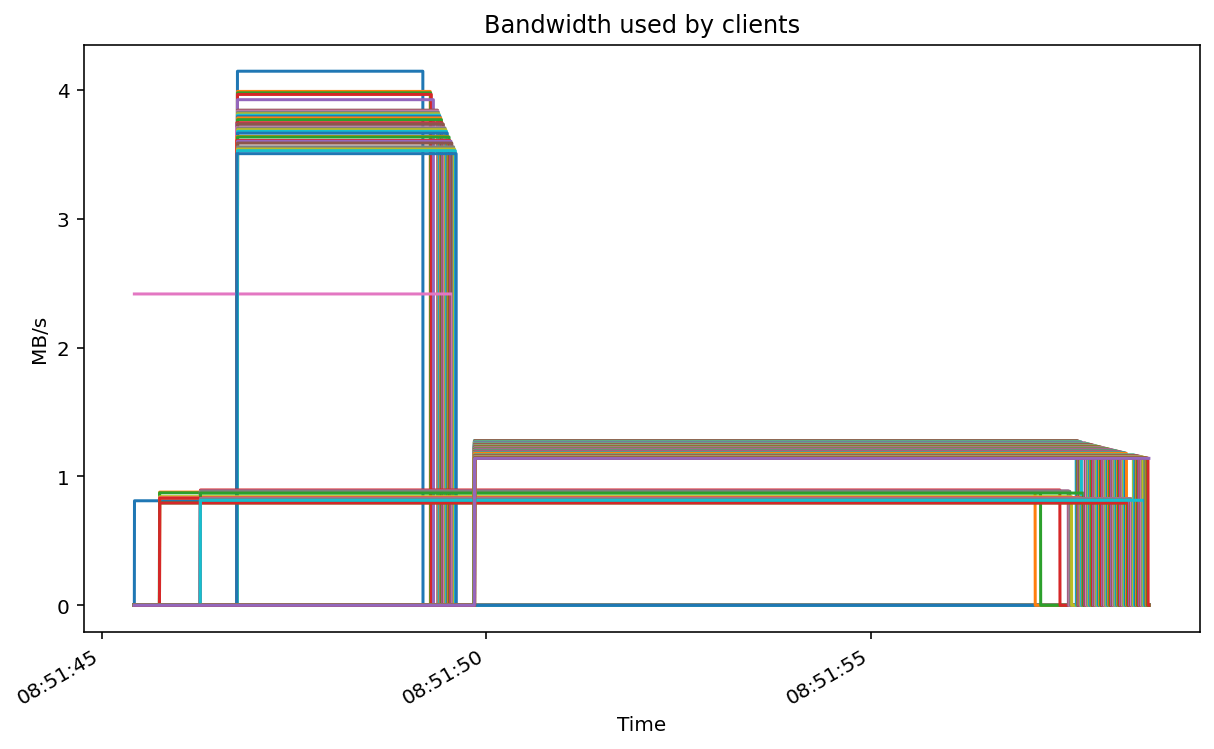

<IPython.core.display.Javascript object>

In [ ]:
# dont_test

ax = df.plot(figsize=(10, 6), legend=False, title="Bandwidth used by clients")
ax.set_xlabel("Time")
_ = ax.set_ylabel("MB/s")

In [ ]:
# for ts in benchmark_client.timestamps:
#     start, end = ts
#     duration = (end - start).total_seconds()
#     print(duration, start, end)

In [ ]:
# dont_test 

benchmark_client = gevent_client.GeventClient(
    name="gevent", host=server_host_name, port=server_port
)
elapsed = benchmark_client.measure(epoch)
print(f"elapsed: {elapsed}")

measure
measure server
http://192.168.178.113:5100/data/10000000_10_125000000/0
elapsed: 11.961080057999993


<IPython.core.display.Javascript object>

In [ ]:
# dont_test 


df = df_from_timestamps(benchmark_client.timestamps, epoch.file_size)

<IPython.core.display.Javascript object>

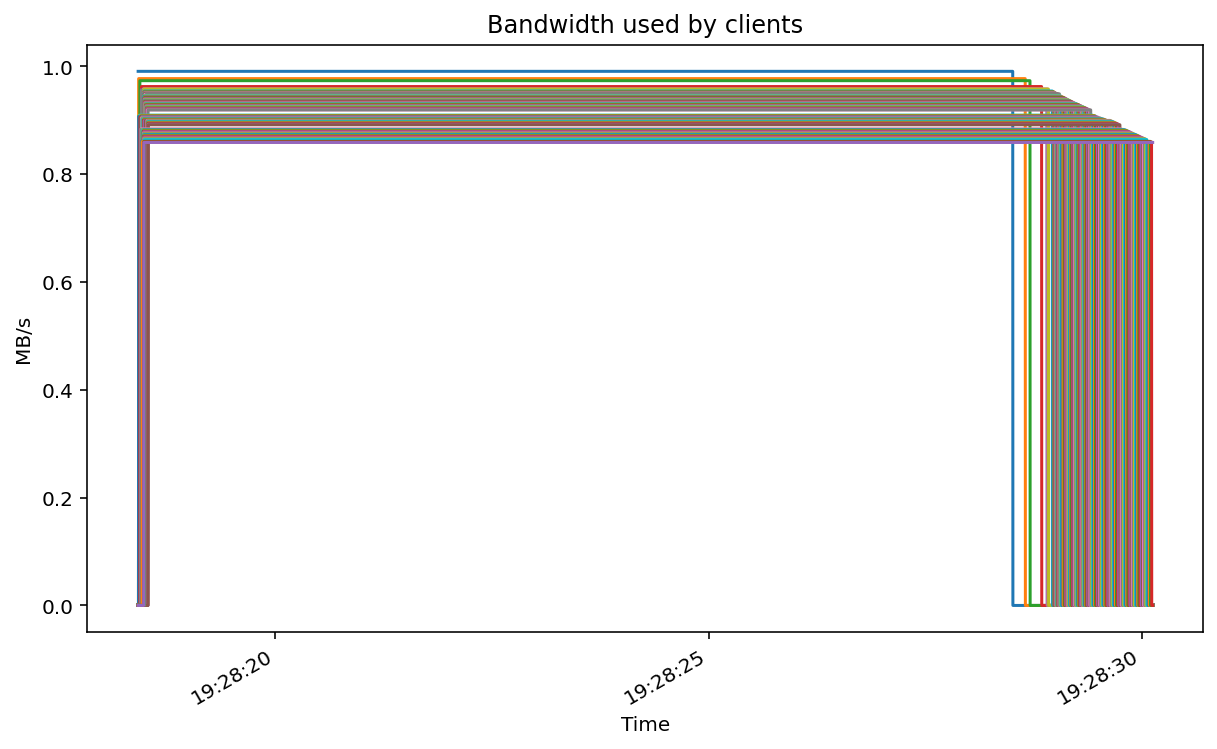

<IPython.core.display.Javascript object>

In [ ]:
# dont_test 

ax = df.plot(figsize=(10, 6), legend=False, title="Bandwidth used by clients")
ax.set_xlabel("Time")
_ = ax.set_ylabel("MB/s")